In [1]:
import pandas as pd

df = pd.read_csv('colon_image_dist_results.csv')
df.head()

,gene,total_num_dist,num_diff_dist,hypergeom_p_val,fraction_diff_dist,healthy_low,healthy_medium,healthy_high,health_not_detected,cancer_low,cancer_medium,cancer_high,cancer_not_detected,median_cdist,mean_cdist
0,SLC22A13,2,2,0.000000e+00,1.000000,2,0,0,2,1,0,0,15,0.289651,0.289651
1,CASKIN1,4,4,0.000000e+00,1.000000,0,2,0,0,2,0,0,7,0.286730,0.291112
2,NUP85,16,13,6.510000e-17,0.812500,0,2,0,0,4,2,3,1,0.303801,0.344350
3,CA2,21,14,1.210000e-15,0.666667,0,1,3,0,0,0,0,13,0.289046,0.264565
4,SH3GL2,22,14,3.630000e-15,0.636364,3,0,0,5,3,0,0,26,0.282952,0.288513


In [8]:
target_df = pd.read_csv('unique_target_combination_combo.txt', delimiter='\t')
target_df = target_df[target_df['MSH']=='colorectal neoplasms'].rename(columns={'Gene':'gene'})
target_df.head()

,gene,MSH,MSH.Top,Phase.Latest,lApprovedUS.EU
19,ABCB1,colorectal neoplasms,Neoplasms,Phase I Clinical Trial,False
49,ABCC1,colorectal neoplasms,Neoplasms,Phase I Clinical Trial,False
108,ABL1,colorectal neoplasms,Neoplasms,Phase II Clinical Trial,False
287,ADAM10,colorectal neoplasms,Neoplasms,No Development Reported,False
299,ADAM17,colorectal neoplasms,Neoplasms,No Development Reported,False


In [9]:
target_df.groupby('Phase.Latest').count()

,gene,MSH,MSH.Top,lApprovedUS.EU
Phase.Latest,,,,
Discontinued,27,27,27,27
Launched,9,9,9,9
No Development Reported,88,88,88,88
Phase I Clinical Trial,61,61,61,61
Phase II Clinical Trial,88,88,88,88
Phase III Clinical Trial,7,7,7,7
Pre-registration,2,2,2,2
Preclinical,9,9,9,9
Withdrawn,1,1,1,1


In [35]:
success_df = target_df[target_df['Phase.Latest'].isin(['Launched', 'Pre-registration', 'Discontinued'])]

In [36]:
success_df['success'] = success_df.apply(lambda row: 0 if row['Phase.Latest']=='Discontinued' else 1, axis=1)

/home/martin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
success_df = success_df.merge(df, on='gene')
success_df

,gene,MSH,MSH.Top,Phase.Latest,lApprovedUS.EU,success,total_num_dist,num_diff_dist,hypergeom_p_val,fraction_diff_dist,healthy_low,healthy_medium,healthy_high,health_not_detected,cancer_low,cancer_medium,cancer_high,cancer_not_detected,median_cdist,mean_cdist
0,CD55,colorectal neoplasms,Neoplasms,Discontinued,False,0,27,1,3.939235e-01,0.037037,3,3,3,0,9,5,8,5,0.123029,0.147588
1,EGFR,colorectal neoplasms,Neoplasms,Launched,True,1,27,0,7.497182e-01,0.000000,6,3,0,4,12,6,0,20,0.151003,0.144850
2,ESR1,colorectal neoplasms,Neoplasms,Discontinued,False,0,30,3,6.073387e-02,0.100000,0,0,0,13,3,0,0,33,0.180094,0.195563
3,GPA33,colorectal neoplasms,Neoplasms,Discontinued,False,0,24,0,7.080681e-01,0.000000,0,0,6,0,3,4,4,4,0.155857,0.157732
4,IKBKB,colorectal neoplasms,Neoplasms,Discontinued,False,0,24,9,9.910000e-08,0.375000,0,3,0,0,4,3,5,1,0.229827,0.241308
5,IL2RA,colorectal neoplasms,Neoplasms,Launched,False,1,24,4,5.964935e-03,0.166667,0,0,0,6,3,0,0,13,0.177504,0.181122
6,KIT,colorectal neoplasms,Neoplasms,Launched,True,1,33,0,8.160430e-01,0.000000,0,0,0,11,0,0,0,35,0.158044,0.162489
7,LGALS3,colorectal neoplasms,Neoplasms,Pre-registration,True,1,14,1,1.529740e-01,0.071429,0,0,5,0,0,7,7,0,0.206550,0.179470
8,POLB,colorectal neoplasms,Neoplasms,Discontinued,False,0,15,1,1.709416e-01,0.066667,2,3,0,0,5,6,0,6,0.154200,0.161896
9,PTGS1,colorectal neoplasms,Neoplasms,Discontinued,False,0,24,0,7.080681e-01,0.000000,3,2,0,0,4,1,0,10,0.120916,0.124527


In [38]:
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, precision_recall_curve


def plot_roc_curve(y_true, y_pred, title):
    plt.figure()
    lw=2
    fpr, tpr, thresh = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    plt.plot(fpr, tpr, color='green', lw=lw, label='AUROC: {:0.3f}'.format(auc))

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

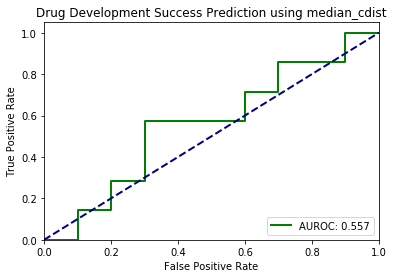

In [42]:
plot_roc_curve(success_df['success'], success_df['median_cdist'], 'Drug Development Success Prediction using median_cdist')

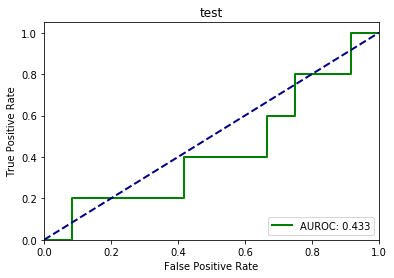

In [40]:
success_df['approved'] = success_df.apply(lambda row: 1 if row['lApprovedUS.EU'] else 0, axis=1)
plot_roc_curve(success_df['approved'], success_df['median_cdist'], 'test')